In [1]:
# set workspace
WhoIsWorking = "RT"
WorkLocation = "School"

if WhoIsWorking == "RT":
    if WorkLocation == "Home":
        folder_path = r'C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data'
    elif WorkLocation == "School":
        folder_path = r'D:\ENGO645_TermProject_Data'

print(folder_path)

D:\ENGO645_TermProject_Data


In [2]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd

In [3]:
# Load and read the MCI file
MCI_file = os.path.join(folder_path, "MCI_Cleaned.csv")
MCI_data = pd.read_csv(MCI_file)
 
MCI_data

,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TIMECategory,TEMP,TEMPCategory
0,2023,January,1,1,Sunday,2,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,Corso Italia-Davenport,-79.450529,43.676205,2023/1/1 2,Night,4.7,Mild
1,2023,January,1,1,Sunday,1,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,Night,4.5,Mild
2,2023,January,1,1,Sunday,9,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Morningside Heights,-79.202638,43.815274,2023/1/1 9,Morning,4.4,Mild
3,2023,January,1,1,Sunday,3,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault With Weapon,Assault,New Toronto,-79.517052,43.600915,2023/1/1 3,Night,4.9,Mild
4,2023,January,1,1,Sunday,21,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Victoria Village,-79.300571,43.719703,2023/1/1 21,Evening,4.1,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,2014,December,31,365,Wednesday,16,"Apartment (Rooming House, Condo)",Apartment,B&E,Break and Enter,Wellington Place,-79.390275,43.647849,2014/12/31 16,Afternoon,-6.3,Chilly
365682,2014,December,31,365,Wednesday,12,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault With Weapon,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,Afternoon,-6.3,Chilly
365683,2014,December,31,365,Wednesday,12,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,Afternoon,-6.3,Chilly
365684,2014,December,31,365,Wednesday,22,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Greenwood-Coxwell,-79.325929,43.671381,2014/12/31 22,Evening,-5.7,Chilly


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening') &
                         (MCI_data['PREMISES_TYPE'] == 'Apartment')]

# Get unique years
unique_years = filtered_data['OCC_YEAR'].unique()

# Set up the grid for subplots
n_rows = len(unique_years) // 2 + len(unique_years) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
axs = axs.flatten()

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Iterate over unique years and plot KDE for each year
for i, year in enumerate(unique_years):
    # Subset data for the current year
    data_year = filtered_data[filtered_data['OCC_YEAR'] == year]

    # Construct the full path to the shapefile
    shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

    # Load the shapefile containing neighborhood boundaries
    neighborhoods_shp = gpd.read_file(shapefile_path)

    # Plot KDE using Seaborn with custom parameters
    sns.kdeplot(data=data_year, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=axs[i],
                bw_adjust=0.5, zorder=0, color='black')

    # Plot neighborhood boundaries on top of KDE
    neighborhoods_shp.plot(ax=axs[i], color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

    axs[i].set_title(f'Assault, Evening, Apt., Year: {year}')
    
    # Turn off both X and Y axes
    axs[i].axis('off')

# Hide empty subplots if necessary
for j in range(len(unique_years), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

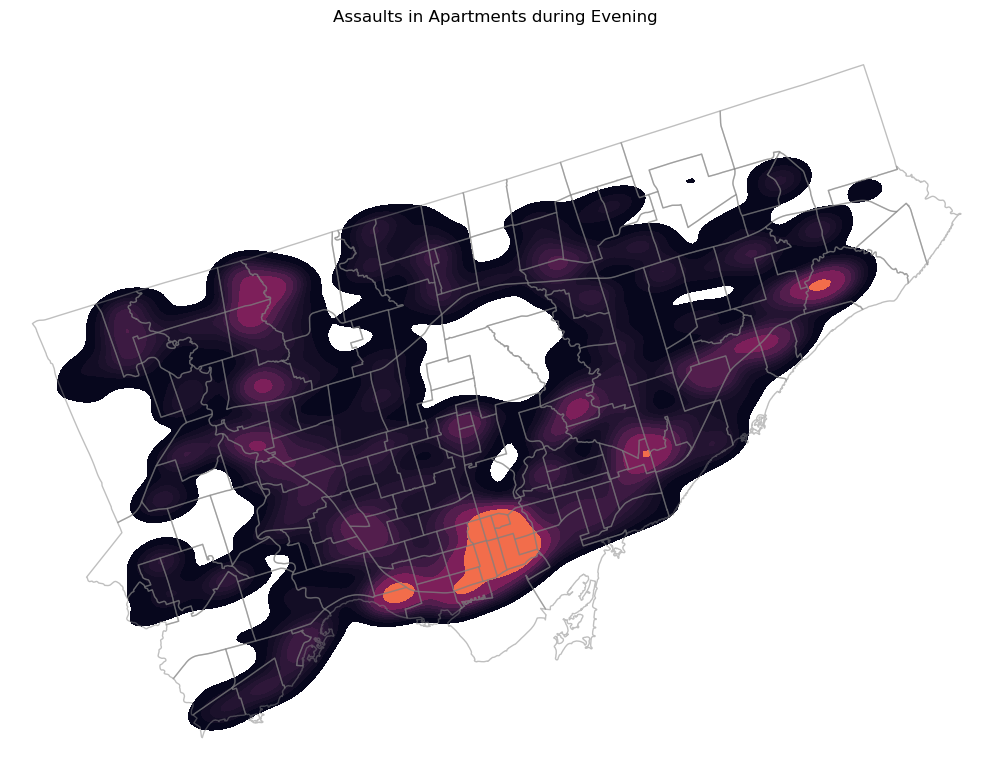

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening') &
                         (MCI_data['PREMISES_TYPE'] == 'Apartment')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='rocket', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Assaults in Apartments during Evening')
ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening') &
                         (MCI_data['TEMPCategory'] == 'Mild')]

# Get unique years
unique_years = filtered_data['OCC_YEAR'].unique()

# Set up the grid for subplots
n_rows = len(unique_years) // 2 + len(unique_years) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
axs = axs.flatten()

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Iterate over unique years and plot KDE for each year
for i, year in enumerate(unique_years):
    # Subset data for the current year
    data_year = filtered_data[filtered_data['OCC_YEAR'] == year]

    # Construct the full path to the shapefile
    shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

    # Load the shapefile containing neighborhood boundaries
    neighborhoods_shp = gpd.read_file(shapefile_path)

    # Plot KDE using Seaborn with custom parameters
    sns.kdeplot(data=data_year, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=axs[i],
                bw_adjust=0.5, zorder=0, color='black')

    # Plot neighborhood boundaries on top of KDE
    neighborhoods_shp.plot(ax=axs[i], color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

    axs[i].set_title(f'Assault, Evening, Mild Weather, Year: {year}')
    
    # Turn off both X and Y axes
    axs[i].axis('off')

# Hide empty subplots if necessary
for j in range(len(unique_years), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

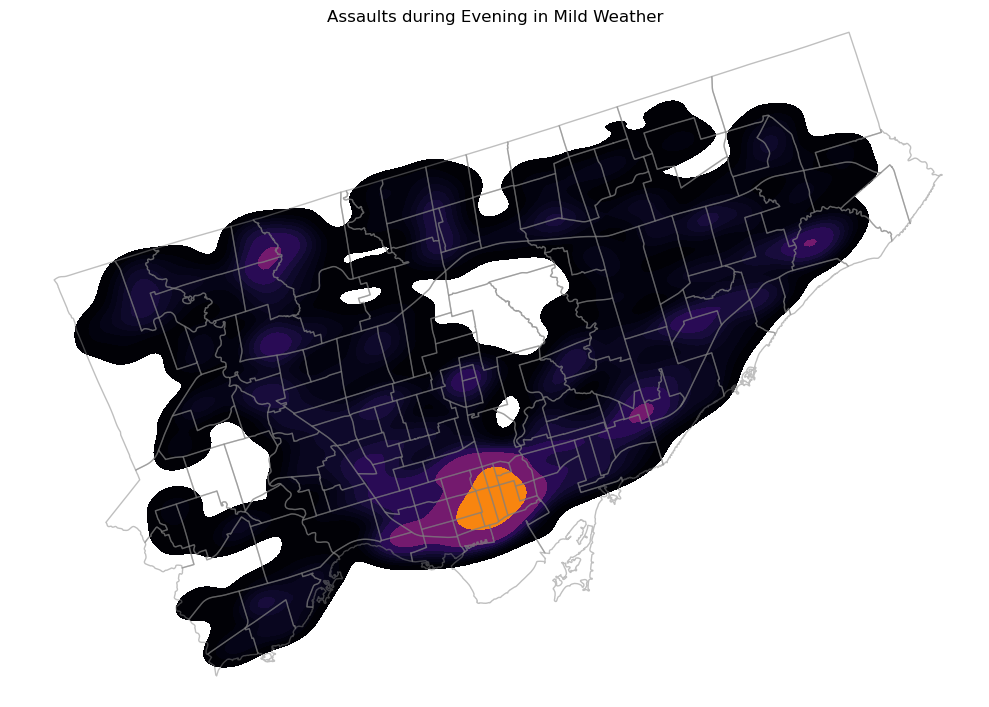

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening') &
                         (MCI_data['TEMPCategory'] == 'Mild')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='rocket', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Assaults during Evening in Mild Weather')
ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening')]

# Get unique years
unique_years = filtered_data['OCC_YEAR'].unique()

# Set up the grid for subplots
n_rows = len(unique_years) // 2 + len(unique_years) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
axs = axs.flatten()

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Iterate over unique years and plot KDE for each year
for i, year in enumerate(unique_years):
    # Subset data for the current year
    data_year = filtered_data[filtered_data['OCC_YEAR'] == year]

    # Construct the full path to the shapefile
    shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

    # Load the shapefile containing neighborhood boundaries
    neighborhoods_shp = gpd.read_file(shapefile_path)

    # Plot KDE using Seaborn with custom parameters
    sns.kdeplot(data=data_year, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=axs[i],
                bw_adjust=0.5, zorder=0, color='black')

    # Plot neighborhood boundaries on top of KDE
    neighborhoods_shp.plot(ax=axs[i], color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

    axs[i].set_title(f'Assault, Evening, Year: {year}')
    
    # Turn off both X and Y axes
    axs[i].axis('off')

# Hide empty subplots if necessary
for j in range(len(unique_years), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

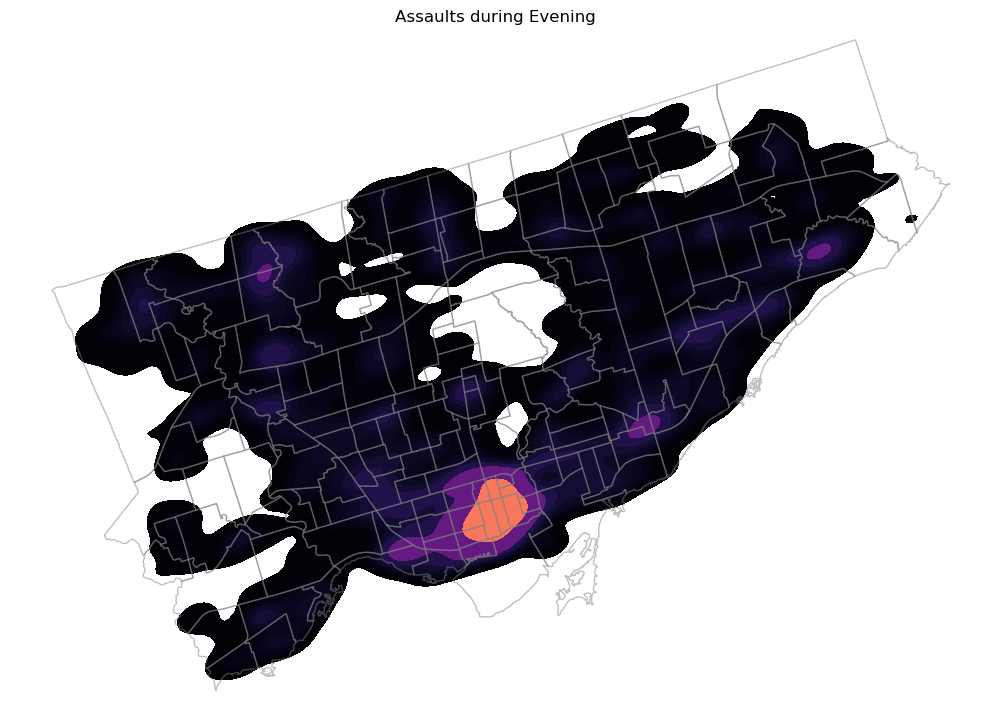

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault') &
                         (MCI_data['TIMECategory'] == 'Evening')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='rocket', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Assaults during Evening')
ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault')]

# Get unique years
unique_years = filtered_data['OCC_YEAR'].unique()

# Set up the grid for subplots
n_rows = len(unique_years) // 2 + len(unique_years) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
axs = axs.flatten()

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Iterate over unique years and plot KDE for each year
for i, year in enumerate(unique_years):
    # Subset data for the current year
    data_year = filtered_data[filtered_data['OCC_YEAR'] == year]

    # Construct the full path to the shapefile
    shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

    # Load the shapefile containing neighborhood boundaries
    neighborhoods_shp = gpd.read_file(shapefile_path)

    # Plot KDE using Seaborn with custom parameters
    sns.kdeplot(data=data_year, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=axs[i],
                bw_adjust=0.5, zorder=0, color='black')

    # Plot neighborhood boundaries on top of KDE
    neighborhoods_shp.plot(ax=axs[i], color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

    axs[i].set_title(f'Assault and Year: {year}')
    
    # Turn off both X and Y axes
    axs[i].axis('off')

# Hide empty subplots if necessary
for j in range(len(unique_years), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

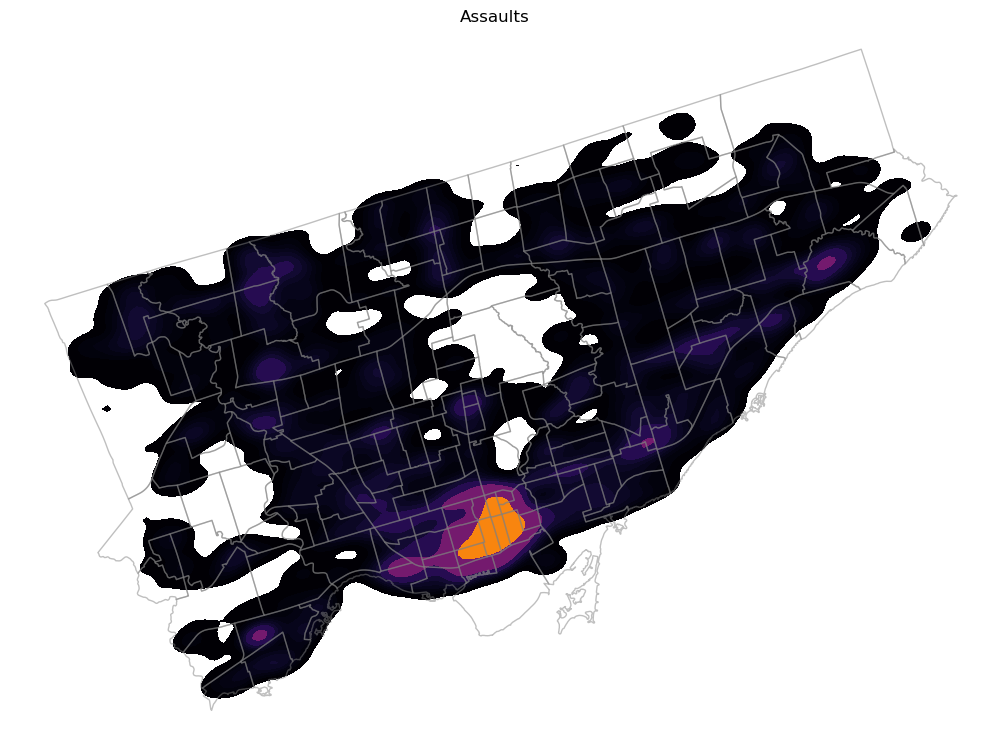

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Assault')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Assaults')
ax.axis('off')

plt.tight_layout()
plt.show()

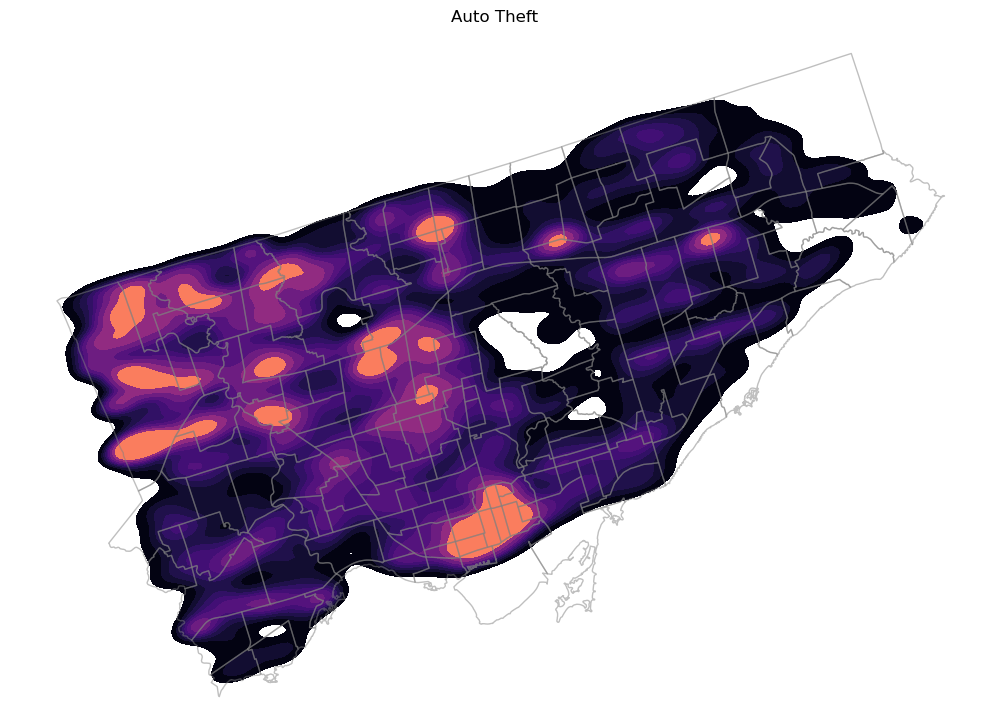

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Auto Theft')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='magma', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Auto Theft')
ax.axis('off')

plt.tight_layout()
plt.show()


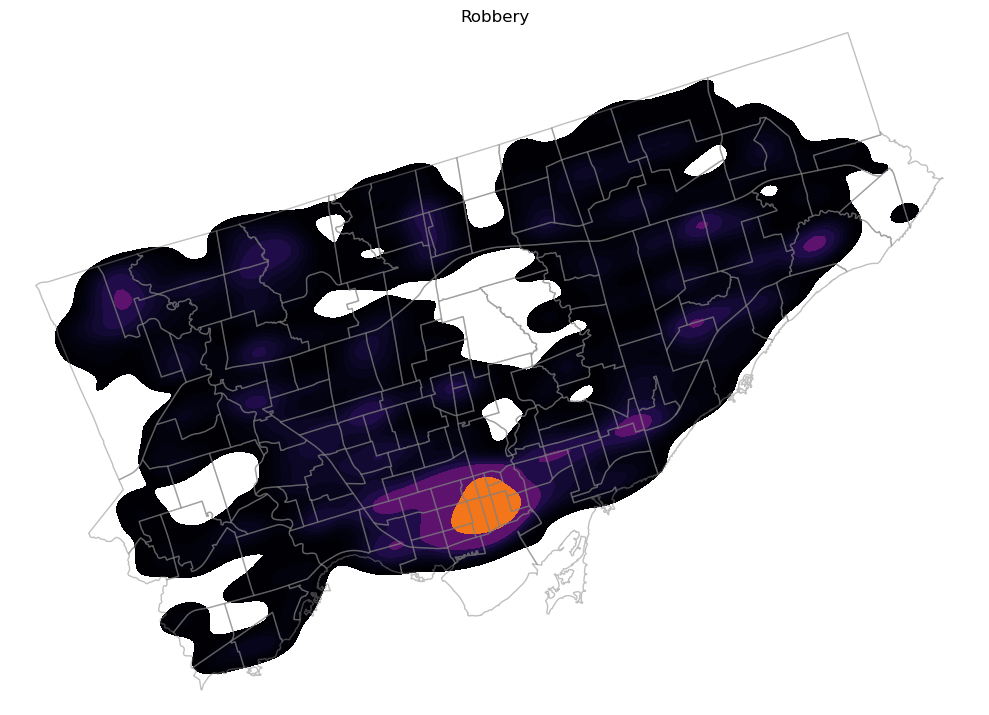

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Robbery')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Robbery')
ax.axis('off')

plt.tight_layout()
plt.show()


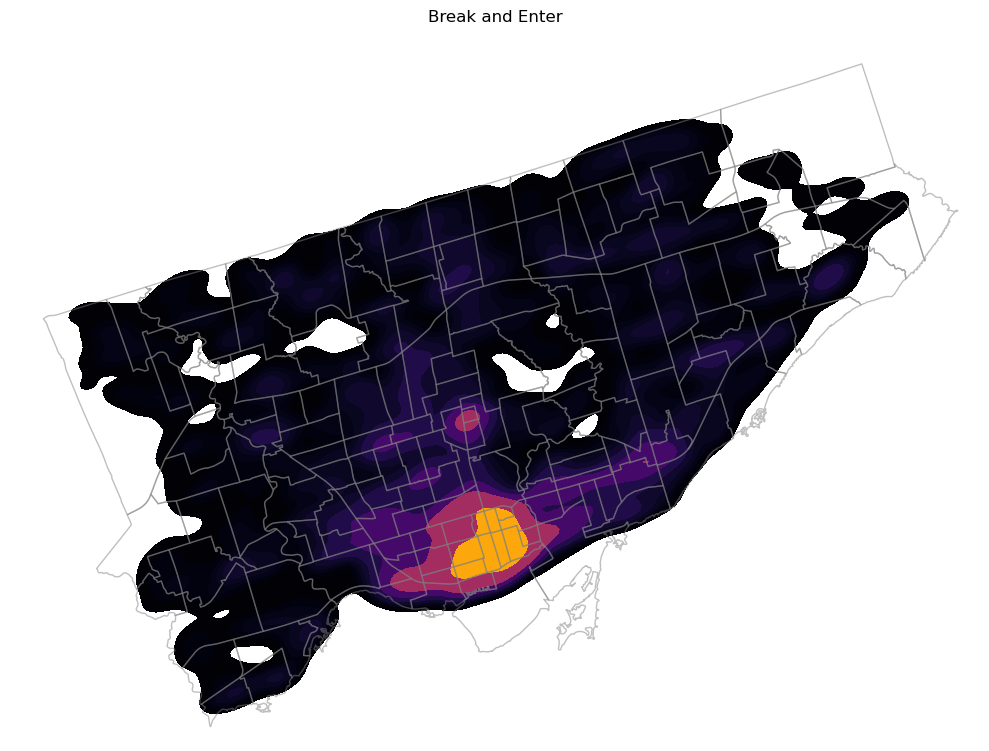

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Break and Enter')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Break and Enter')
ax.axis('off')

plt.tight_layout()
plt.show()

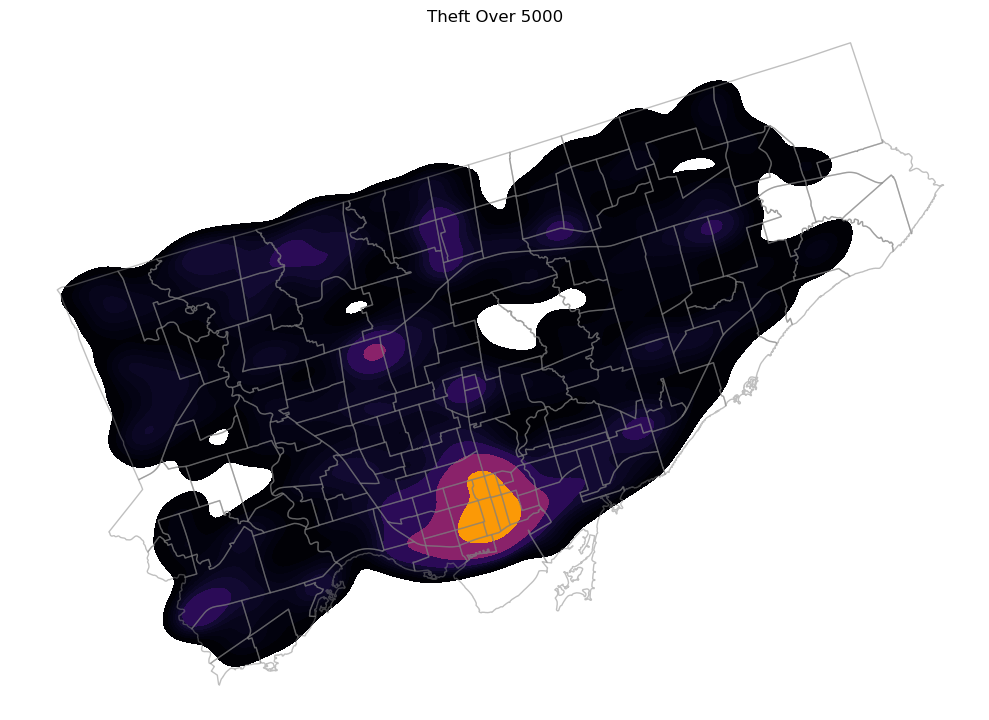

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Filter data based on conditions
filtered_data = MCI_data[(MCI_data['MCI_CATEGORY'] == 'Theft Over')]

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=filtered_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('Theft Over 5000')
ax.axis('off')

plt.tight_layout()
plt.show()

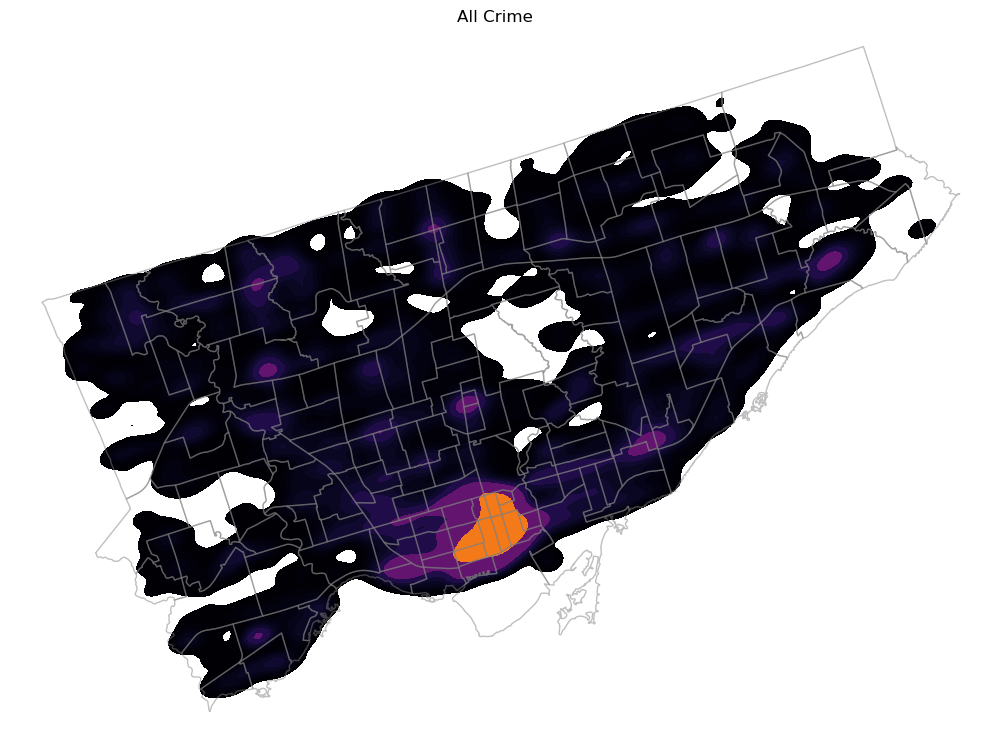

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Set up the grid for subplots
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Construct the full path to the shapefile
shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

# Load the shapefile containing neighborhood boundaries
neighborhoods_shp = gpd.read_file(shapefile_path)

# Plot KDE using Seaborn with custom parameters
sns.kdeplot(data=MCI_data, x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=ax,
            bw_adjust=0.5, zorder=0, color='black')

# Plot neighborhood boundaries on top of KDE
neighborhoods_shp.plot(ax=ax, color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

ax.set_title('All Crime')
ax.axis('off')

plt.tight_layout()
plt.show()

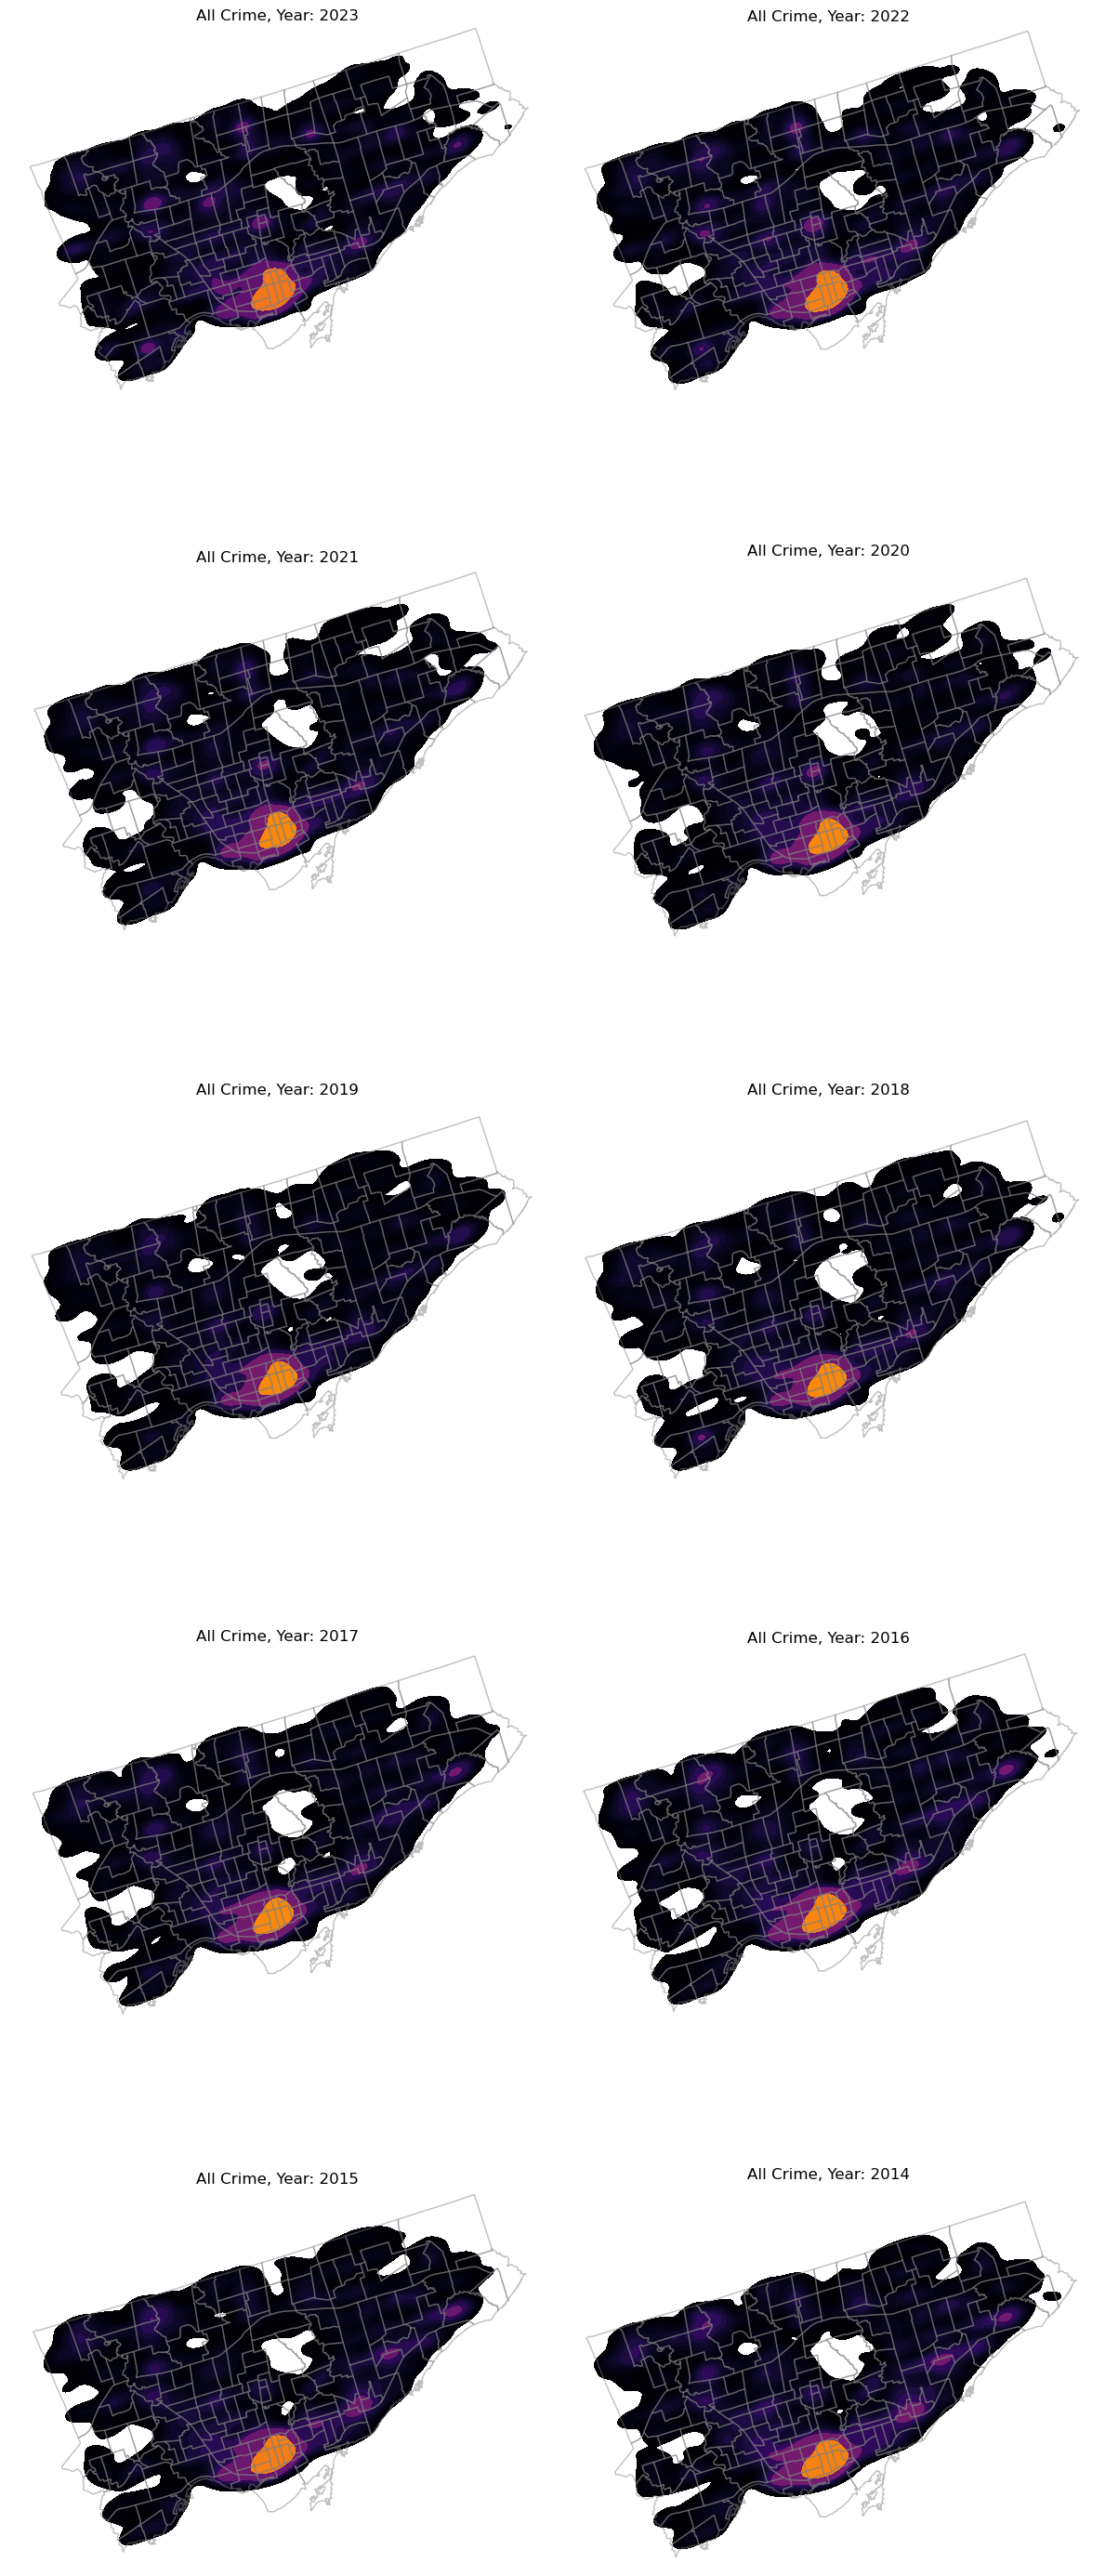

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

# Get unique years from the entire dataset
unique_years = MCI_data['OCC_YEAR'].unique()

# Set up the grid for subplots
n_rows = len(unique_years) // 2 + len(unique_years) % 2
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 6 * n_rows))
axs = axs.flatten()

# Define dark grey color RGB values
dark_grey = (0.2, 0.2, 0.2)

# Iterate over unique years and plot KDE for each year
for i, year in enumerate(unique_years):
    # Construct the full path to the shapefile
    shapefile_path = os.path.join(folder_path, "Neighbourhoods.shp")

    # Load the shapefile containing neighborhood boundaries
    neighborhoods_shp = gpd.read_file(shapefile_path)

    # Plot KDE using Seaborn with custom parameters
    sns.kdeplot(data=MCI_data[MCI_data['OCC_YEAR'] == year], x='LONG_WGS84', y='LAT_WGS84', fill=True, cmap='inferno', ax=axs[i],
                bw_adjust=0.5, zorder=0, color='black')

    # Plot neighborhood boundaries on top of KDE
    neighborhoods_shp.plot(ax=axs[i], color='none', edgecolor='grey', linewidth=1, zorder=1, alpha=0.50)

    axs[i].set_title(f'All Crime, Year: {year}')
    
    # Turn off both X and Y axes
    axs[i].axis('off')

# Hide empty subplots if necessary
for j in range(len(unique_years), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()